In [1]:
## Loading required packages:

packages <- c("tm", "ggplot2", "wordcloud", "cluster", "stringr", "slam", "dplyr")

lapply(packages, FUN = require, character.only = T)


Loading required package: tm
Loading required package: NLP
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Loading required package: wordcloud
Loading required package: RColorBrewer
Loading required package: cluster
Loading required package: stringr
Loading required package: slam
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

In [3]:
##Loading the R-question data and considering only the question titles (col 5) as interest of analysis:
## Considering only a small set of questions (10k) due to memory issues. There are total of ~190k questions.
r_que <- read.csv("../input/Questions.csv", nrow = 20000)
que_titles <- r_que[,5] %>% 
              as.character() %>%
              tolower()
head(que_titles)


[1] "how to access the last value in a vector?"                            
[2] "worse sin: side effects or passing massive objects?"                  
[3] "explain the quantile() function in r"                                 
[4] "how to test for the eof flag in r?"                                   
[5] "is there an r package for learning a dirichlet prior from counts data"
[6] "optimization packages for r"

In [4]:
##Converting the data in a Corpus vector to analyse further using tm-package:
docs <- Corpus(VectorSource(que_titles))
for (doc in docs[1:5]){
    print (doc)
}

[1] "how to access the last value in a vector?"                            
[2] "worse sin: side effects or passing massive objects?"                  
[3] "explain the quantile() function in r"                                 
[4] "how to test for the eof flag in r?"                                   
[5] "is there an r package for learning a dirichlet prior from counts data"
$language
[1] "en"

attr(,"class")
[1] "CorpusMeta"
data frame with 0 columns and 5 rows


In [5]:
## Remove stopwords, some other less-important words by creating customized dictionary, and punctuation:
docs_wo_sw <- tm_map(x = docs, FUN = removeWords, stopwords("english"))
docs_wo_sw <- tm_map(x = docs_wo_sw, FUN = removeWords, c("What", "How", "Is", "Can", "can","using", "Does"))
docs_wo_sw <- tm_map(x = docs_wo_sw, FUN = removePunctuation)
# docs_wo_sw <- tm_map(x = docs_wo_sw, FUN = stemDocument, language = 'english')

##Removing whitespaces:
docs_wo_sw <- tm_map(docs_wo_sw, stripWhitespace)

docs_wo_sw[[1]]$content

[1] " access last value vector"

[1] 10046

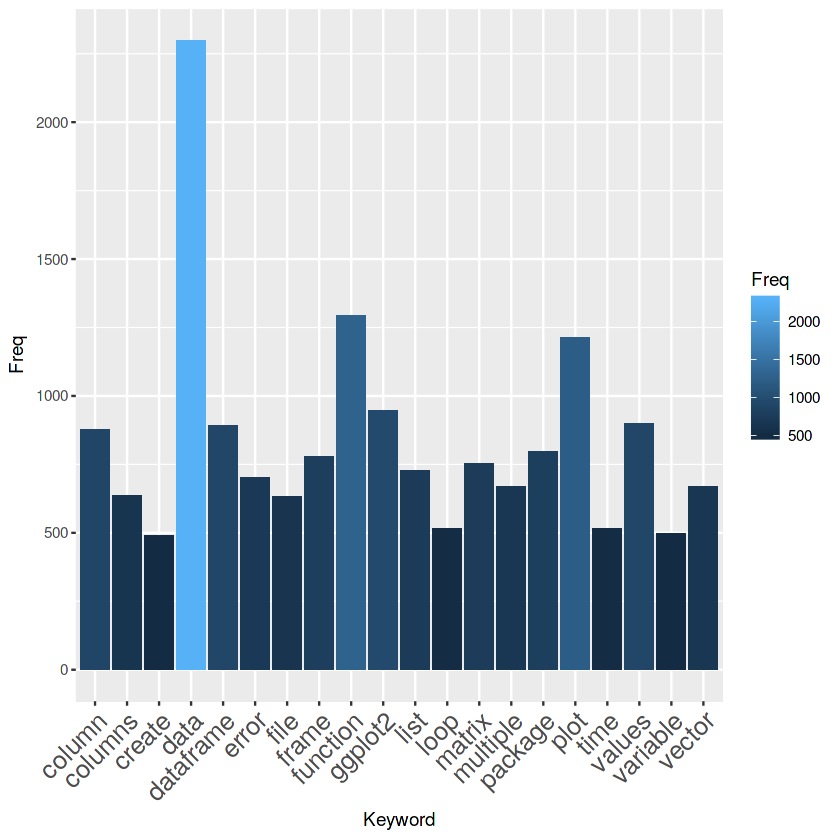

In [6]:
#Creating a document term matrix w/o using TF-IDF:
dtm <- DocumentTermMatrix(docs_wo_sw)

#Organize the data/terms by frequency:
dtm_freq <- colSums(as.matrix(dtm))
length(dtm_freq)

##Creating a dataframe for this o/p (just an alternative view):
dtm_freq_df <- data.frame(Keyword = names(dtm_freq), Freq = dtm_freq)

##Ordering based on frequency:
dtm_freq_df <- dtm_freq_df[with(dtm_freq_df, order(-Freq)), ]

##Plotting data:
p1 <- ggplot(data = head(dtm_freq_df, 20), aes(x = Keyword, y =  Freq, fill = Freq)) +
      geom_bar(stat = "identity") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 15))
p1

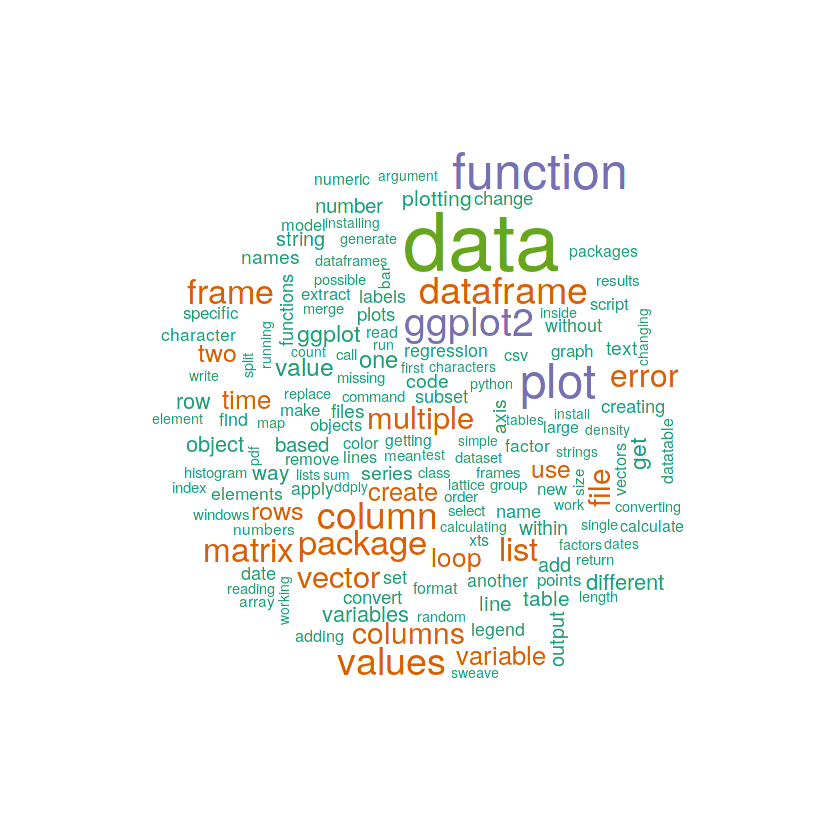

In [7]:
##Creating a wordcloud:
set.seed(10)
wordcloud(names(dtm_freq), freq = dtm_freq, max.words = 150, colors = brewer.pal(5, "Dark2"))

In [8]:
#Creating a document term matrix using TF-IDF:
dtm <- DocumentTermMatrix(docs_wo_sw, control = list(weighting = weightTfIdf))
dtm_dense <- removeSparseTerms(dtm, 0.9999)
dim(dtm_dense)

Warning message in weighting(x):
“empty document(s): 118 8334 19059”

[1] 20000  4698

In [9]:
## Checking a small subset of DTM:
inspect(dtm_dense[1:15,1:10])
colnames(dtm_dense)[0:50]

<<DocumentTermMatrix (documents: 15, terms: 10)>>
Non-/sparse entries: 11/139
Sparsity           : 93%
Maximal term length: 7
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)
Sample             :
    Terms
Docs   access effects     last  massive   objects  passing     side      sin
  1  1.910964 0.00000 2.133206 0.000000 0.0000000 0.000000 0.000000 0.000000
  10 0.000000 0.00000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000
  2  0.000000 1.36961 0.000000 1.814679 0.9522372 1.148541 1.497194 1.898245
  3  0.000000 0.00000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000
  4  0.000000 0.00000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000
  5  0.000000 0.00000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000
  6  0.000000 0.00000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000
  7  0.000000 0.00000 0.000000 0.000000 0.0000000 0.000000 0.000000 0.000000
  8  0.000000 0.00000 0.000000 0.000000 0.0000000 0.000000 0.00

[1] "access"       "last"         "value"        "vector"       "effects"     
 [6] "massive"      "objects"      "passing"      "side"         "sin"         
[11] "explain"      "function"     "quantile"     "eof"          "flag"        
[16] "test"         "counts"       "data"         "dirichlet"    "learning"    
[21] "package"      "prior"        "optimization" "packages"     "thinking"    
[26] "vectors"      "operations"   "vectorize"    "compiled"     "language"    
[31] "filtering"    "intervals"    "like"         "operating"    "time"        
[36] "easiest"      "files"        "install"      "project"      "setup"       
[41] "studio"       "visual"       "way"          "csv"          "file"        
[46] "multiple"     "timeseries"   "operators"    "perls"        "calculation"

In [10]:
## Get similarity among documents (i.e. R-questions) using cosine-similarity as a metric:
tdm <- t(dtm_dense)
tdm_cos_sim <- crossprod_simple_triplet_matrix(tdm)/(sqrt(col_sums(tdm^2) %*% t(col_sums(tdm^2))))
dim(tdm_cos_sim)

[1] 20000 20000

In [11]:
## Let's find the similar questions based on cosine-similarity:
sort(tdm_cos_sim[10,], decreasing = T)[1:10]

docs[[10]]$content
que_titles[10]

docs[[343]]$content
docs[[6362]]$content
docs[[5532]]$content


10      6362       343      1826      3747      5532     11394     15370 
1.0000000 0.8954808 0.8404749 0.8404749 0.8404749 0.8307764 0.7684659 0.7609055 
    12831     14994 
0.7345359 0.6981708

[1] "filtering data in r"

[1] "filtering data in r"

[1] "filtering a data.frame"

[1] "filtering a data frame"

[1] "filtering a matrix"

In [12]:
sort(tdm_cos_sim[4030,], decreasing = T)[1:10]

docs[[4030]]$content
que_titles[4030]

docs[[163]]$content

4030       934     10411     13625      6230     11410      8693      8179 
1.0000000 0.8351738 0.8031927 0.8031927 0.7221692 0.6909058 0.6367195 0.6367195 
     1412       163 
0.6211169 0.6102672

[1] "calling r from within smalltalk?"

[1] "calling r from within smalltalk?"

[1] "calling clojure from within r?"

In [13]:
sort(tdm_cos_sim[101,], decreasing = T)[1:10]

docs[[101]]$content
docs[[5294]]$content
docs[[7498]]$content

101     18113     16443     10468      5294     16929     17802     14400 
1.0000000 0.4560062 0.3490861 0.3422326 0.3414534 0.3075530 0.3073545 0.3000463 
     7498     12501 
0.2982324 0.2948212

[1] "how to export the definition of an r object to plain text so that others can recreate it?"

[1] "export matrix in r"

[1] "function argument definition issue in r"

In [14]:
new_que <- 'how to sort dataframe in r'

## Find relevant questions to new question:
get_similar_questions <- function(new_que = new_que, trained_dtm = dtm_dense, available_ques = que_titles){

    doc_new <- Corpus(VectorSource(new_que))

    docs_new <- tm_map(x = doc_new, FUN = removeWords, c("What", "How", "Is", "Can", "can","using", "Does", stopwords("english")))
    docs_new <- tm_map(x = docs_new, FUN = removePunctuation)
    docs_new <- tm_map(x = docs_new, FUN = stripWhitespace)

    dtm_new <- DocumentTermMatrix(docs_new)
    terms <- as.vector(c(colnames(dtm_new)))

    temp_data <- as.data.frame(as.matrix(trained_dtm[, intersect(colnames(trained_dtm), terms)]))
#     temp_data <- temp_data[order(temp_data[terms[2]], temp_data[terms[1]], decreasing = T),]
    temp_data <- temp_data[do.call(order, c(temp_data[, match(terms, names(temp_data))], list(decreasing = T))),]
    inds <- as.numeric(rownames(temp_data))[1:10]

    print ('Most relevant questions are:')
    for (i in inds){
        print (available_ques[i])
    }
    
   } 

In [15]:
get_similar_questions(new_que = 'how to filter dataframe in r')

[1] "Most relevant questions are:"
[1] "filtering a data.frame"
[1] "for each row in an r dataframe"
[1] "class \"by\" into dataframe in r"
[1] "filtering a dataframe in r"
[1] "levels in r dataframe"
[1] "subselection dataframe"
[1] "r dataframe filtering"
[1] "r sort() data.frame"
[1] "plotting a data.frame in r"
[1] "r's xml to dataframe"


In [16]:
get_similar_questions(new_que = 'nested for loop in r')

[1] "Most relevant questions are:"
[1] "do while loop in r"
[1] "for-loop vs while loop in r"
[1] "do-while loop in r"
[1] "doing a loop in r"
[1] "for loop in a for loop?"
[1] "loop of a loop in r"
[1] "using a for loop"
[1] "the for loop again"
[1] "speeding up while loop nested in a for loop in r"
[1] "in r, the arguments of \"for loop\""


In [17]:
get_similar_questions(new_que = 'how to plot barplot in ggplot r')

[1] "Most relevant questions are:"
[1] "barplot in ggplot"
[1] "barplot error in r"
[1] "cleaning up a barplot in r"
[1] "barplot using ggplot2"
[1] "barplot in loop in r"
[1] "labeling in barplot()"
[1] "stacked barplot"
[1] "making a barplot"
[1] "barplot error in r using ggplot"
[1] "ggplot dodged barplot"
